### Import libraries

In [1]:
from utilities import read_data, plot_categorical_features, plot_numeric_features, plot_corr_hmap, plot_labels, lower_strings
import matplotlib.pyplot as plt

### Configure defaults

In [2]:
data_path = '../data/bank_churners.csv'
train_path = '../data/train.csv'
index_column = ['CLIENTNUM']
target_col = 'attrition_flag'

# set plotting style
plt.style.use('fivethirtyeight')

### Load data

In [3]:
data = read_data(data_path=data_path, index_col=index_column)
data = data.iloc[:,:-2]
data.columns = lower_strings(data.columns)

data.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
train = read_data(train_path, index_col=lower_strings(index_column))
train.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
clientnum,,,,,,,,,,,,,,,,,,,,
779040408,Existing Customer,56,M,2,High School,Married,$120K +,Blue,37,3,1,2,12181.0,1702,10479.0,0.834,1478,33,0.500,0.140
714212358,Attrited Customer,38,F,3,High School,Single,Unknown,Blue,36,1,3,2,5260.0,1706,3554.0,0.359,2142,57,0.676,0.324
714383583,Existing Customer,39,F,2,Unknown,Single,$40K - $60K,Gold,36,5,3,3,23981.0,1696,22285.0,0.837,8646,97,0.902,0.071
779536233,Existing Customer,47,F,4,Graduate,Divorced,$40K - $60K,Blue,30,1,1,1,1438.3,601,837.3,1.000,4669,83,0.729,0.418
720512433,Attrited Customer,56,M,1,Uneducated,Single,$60K - $80K,Blue,36,6,4,3,15219.0,2281,12938.0,0.832,7625,78,0.950,0.150


### Exploratory data analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

**Observation**
- Data contains both numeric (integer, decimals) and categorical columns. Also, there are no missing values in the dataset and from the column types, all of the columns seem to have correct data type.
- `total_ct_chng_q4_q1` is not the difference in total transaction count but instead is a ratio of total transaction count in Q4 over Q1

In [6]:
data.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**Observation**
- All numeric columns (age, counts, amount of money e.g. credit limit and revolving balance) in the dataset have valid values
- Columns' scale differ, we might need to convert columns to same scale in order not to let features with large values dominate features with small values

In [7]:
data[data['customer_age'] >= 60]['customer_age'].count()

532

In [8]:
subset = data[[target_col, 'avg_utilization_ratio', 'credit_limit', 'total_revolving_bal']] \
.sort_values('avg_utilization_ratio', ascending=False)

subset['amount_left_percent'] = subset['total_revolving_bal'] * 100 / subset['credit_limit']

subset.sort_values([target_col,'amount_left_percent'], ascending=False).groupby(target_col).head(3)

,attrition_flag,avg_utilization_ratio,credit_limit,total_revolving_bal,amount_left_percent
CLIENTNUM,,,,,
778885158,Existing Customer,0.994,2472.0,2457,99.393204
710382108,Existing Customer,0.988,2452.0,2423,98.817292
778327908,Existing Customer,0.984,2419.0,2380,98.387764
709444983,Attrited Customer,0.999,2435.0,2432,99.876797
715847058,Attrited Customer,0.995,1863.0,1853,99.463231
816476658,Attrited Customer,0.992,1812.0,1798,99.227373


**Observation**
- Majority of customers are younger than `53` years old. Only `5.25 %` of our customers belong to senior citizen (age 60 or above) group
- There exist customers who have attrited and have very high `(>0.99)` average utilization ratio. As well, the customers' spending turned out to reach credit limit leaving more than `99 %` of credit limit as revolving balance.
- If many customers follow this pattern then the bank could face high loss. Thus, bank could try providing rewards if the revolving balance for payment cycle is less than a proper percentage of credit limit to mitigate possible loss

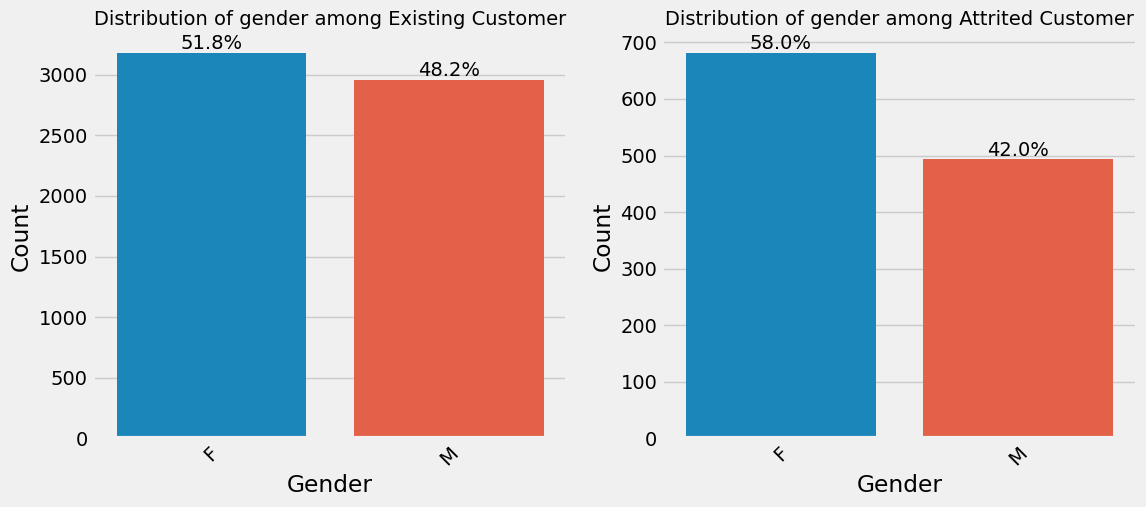

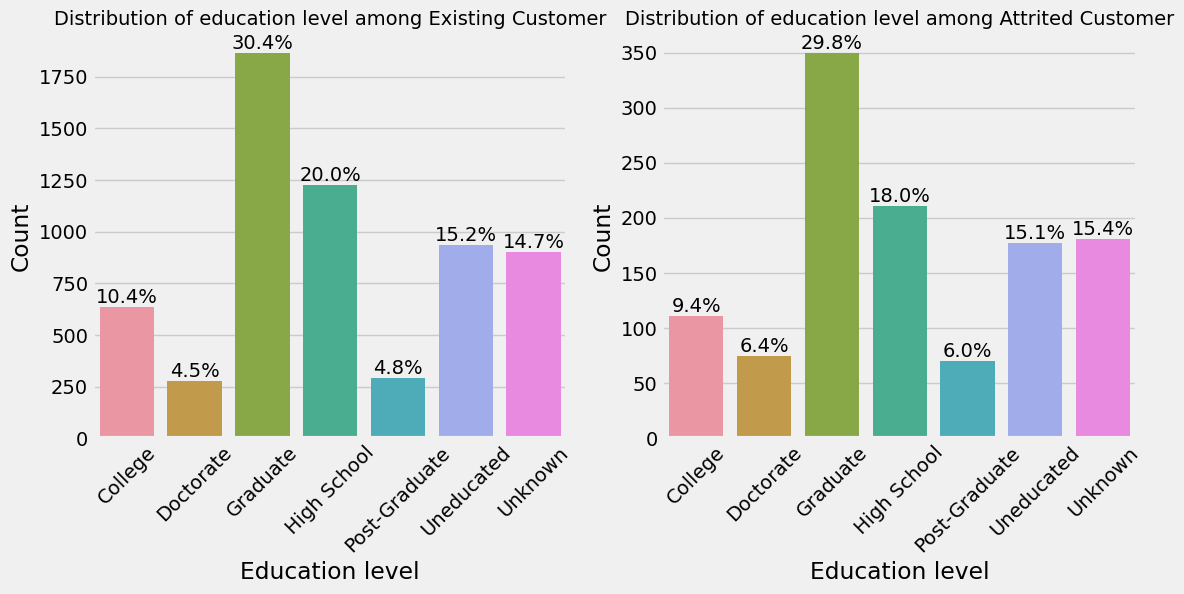

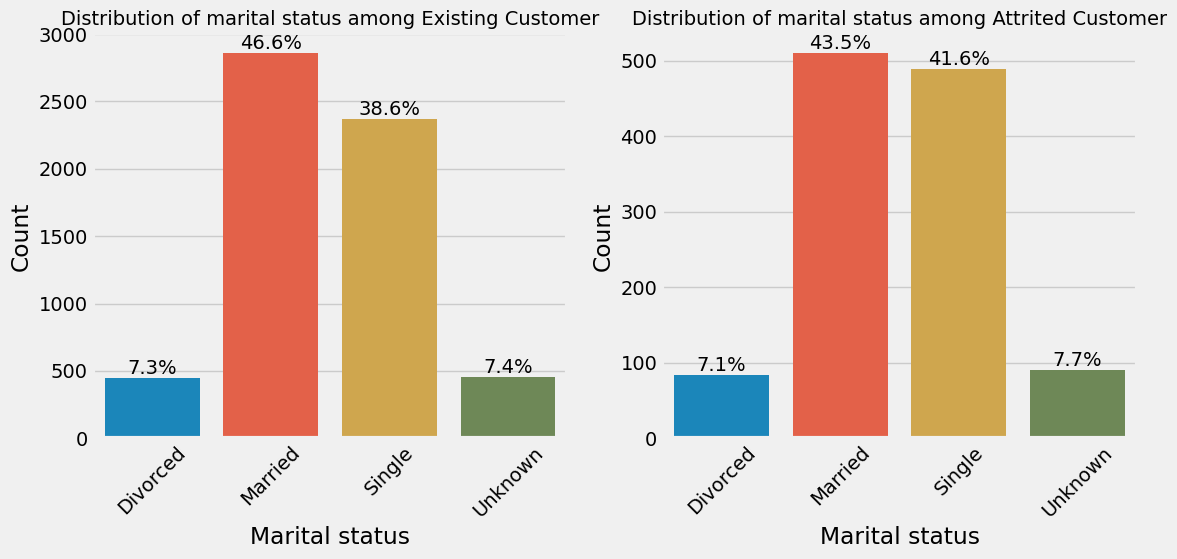

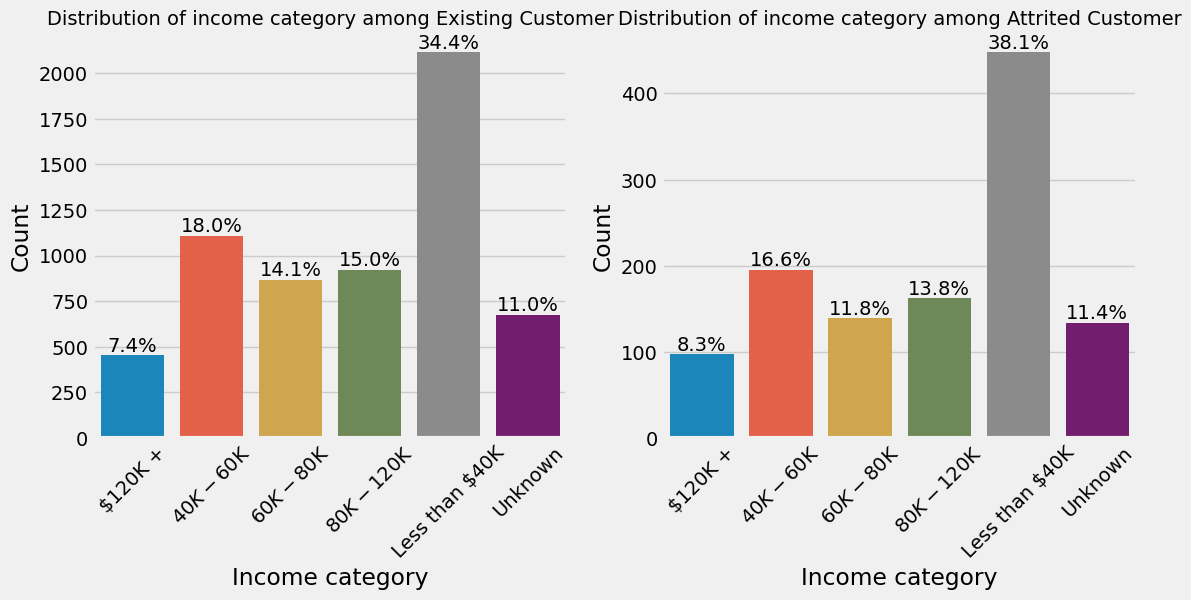

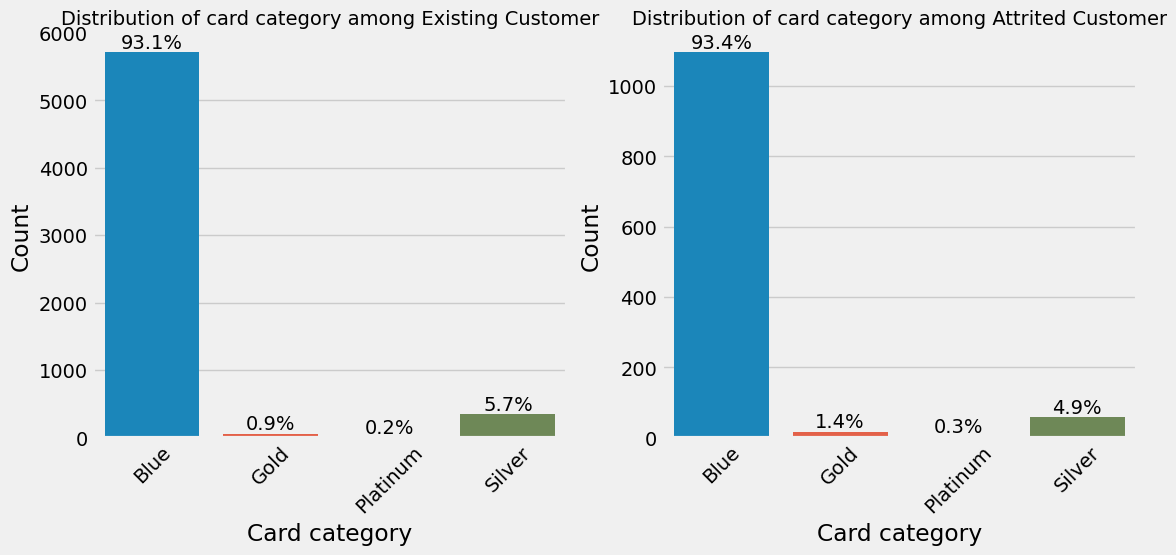

In [9]:
plot_categorical_features(train)

**Observation**
- Both group of customers (attrited and existing) have very similar distribution of `marital_status`, `income_category` and `card_category`. It is highly probable that these features might not help in differentiating attrited customers from existing ones
- For some of the remaining categorical features, it is hard to tell whether difference in distribution of those features was due to the chance. Thus, we need to perform chi-square hypothesis test between the categorical features and our target (attrition flag)

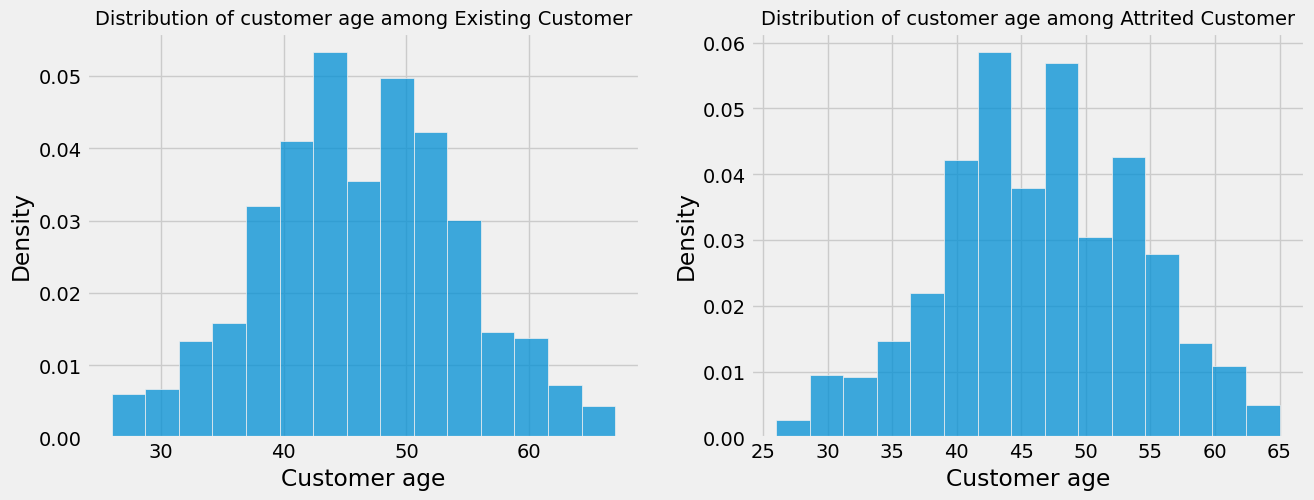

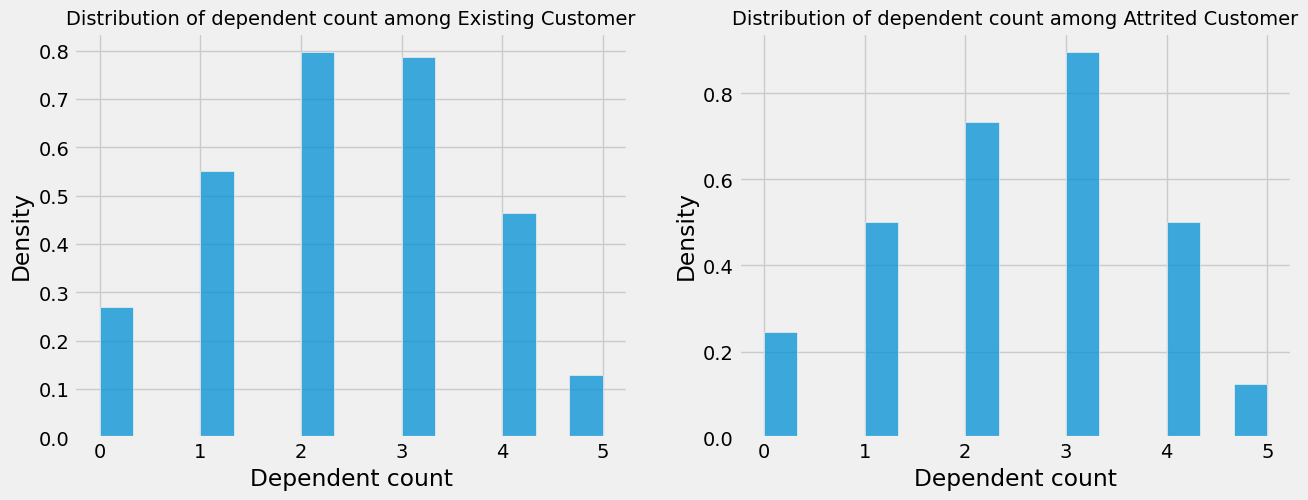

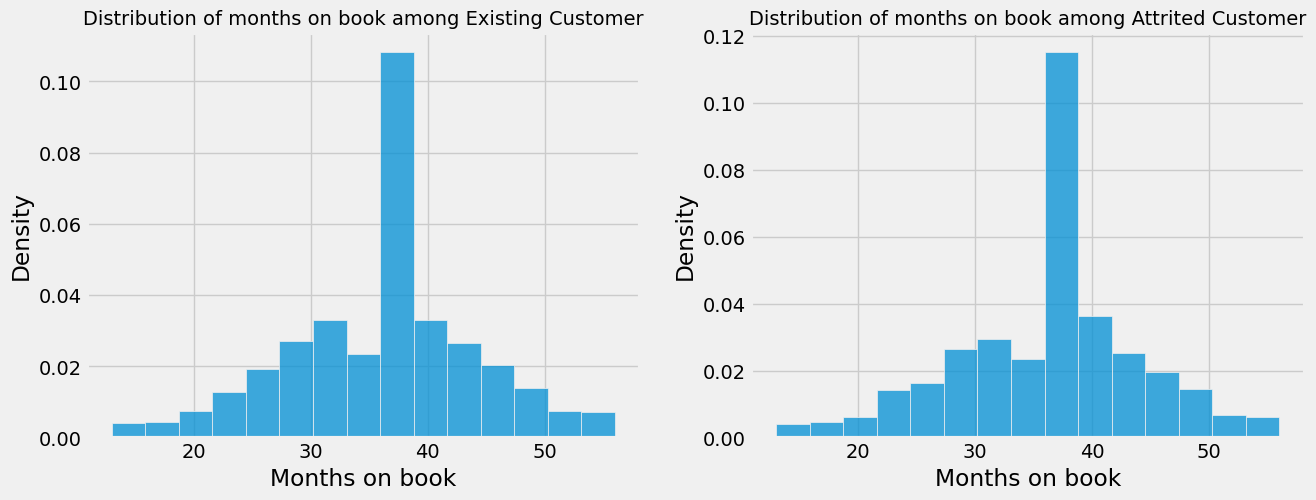

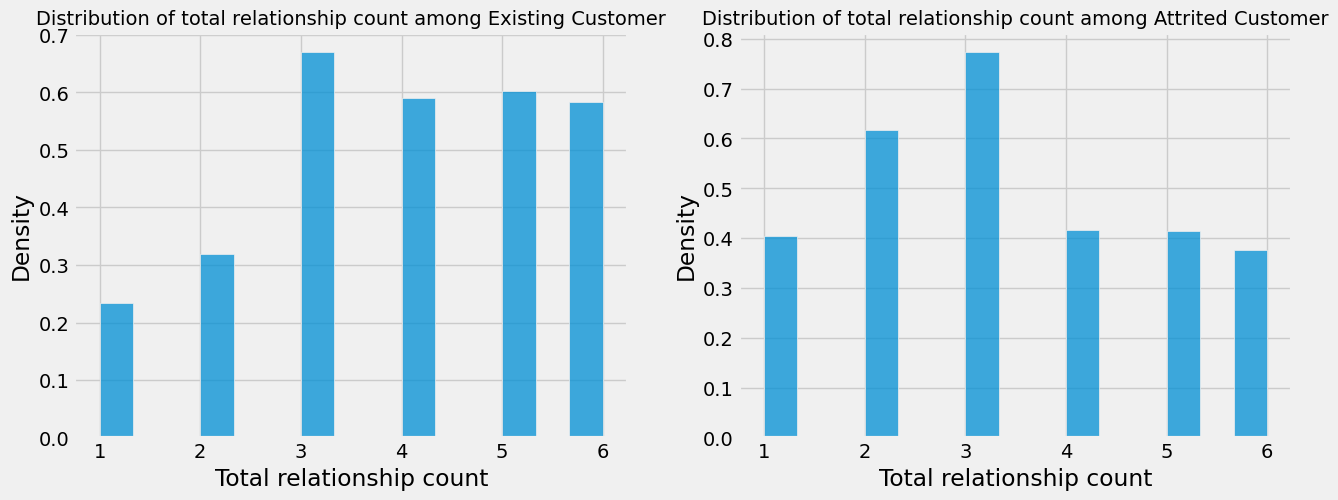

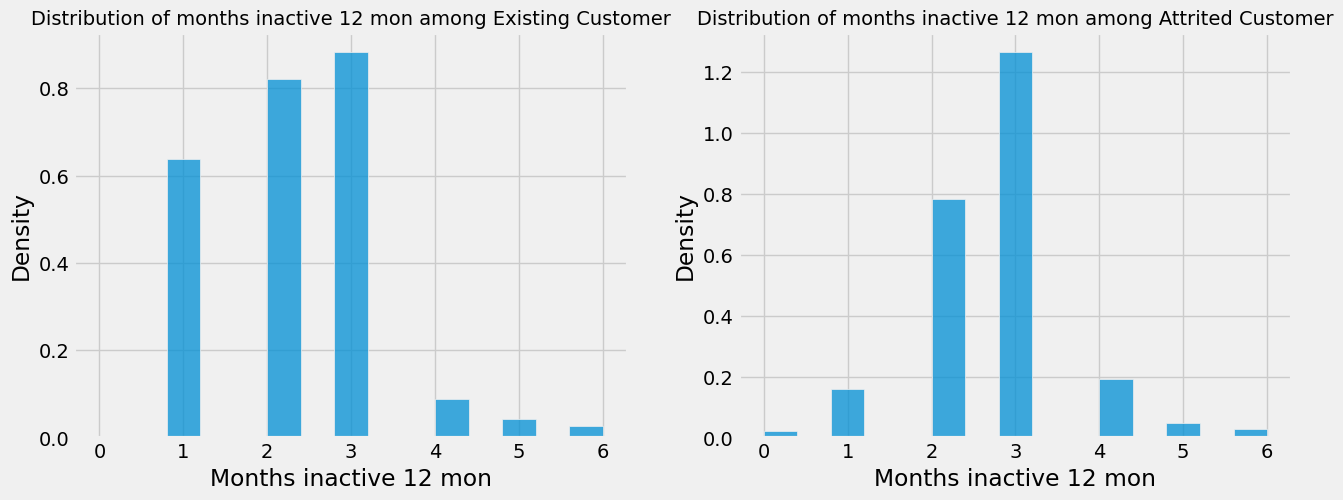

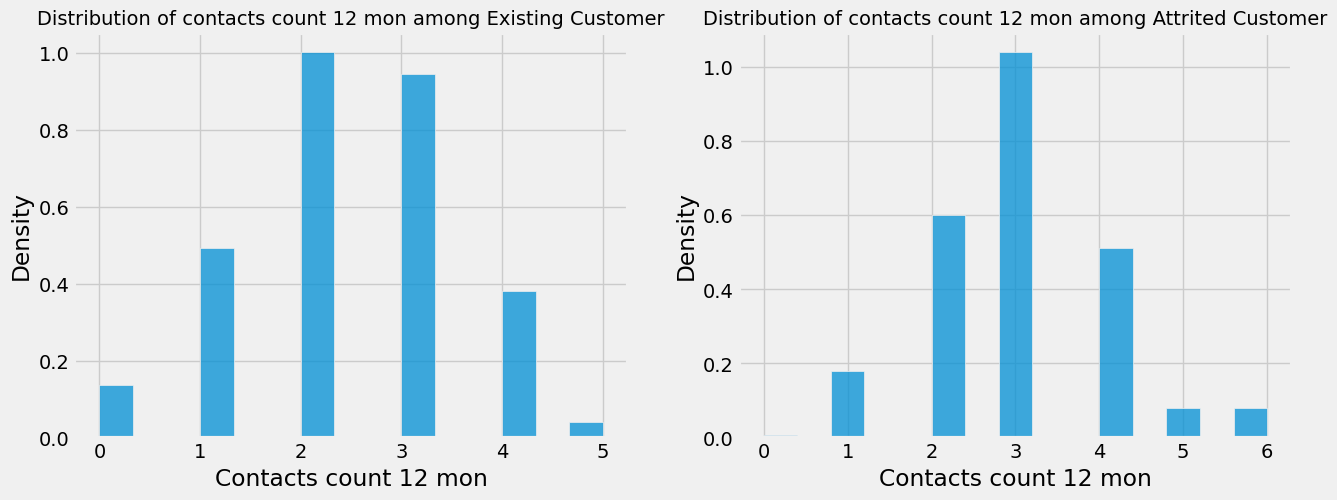

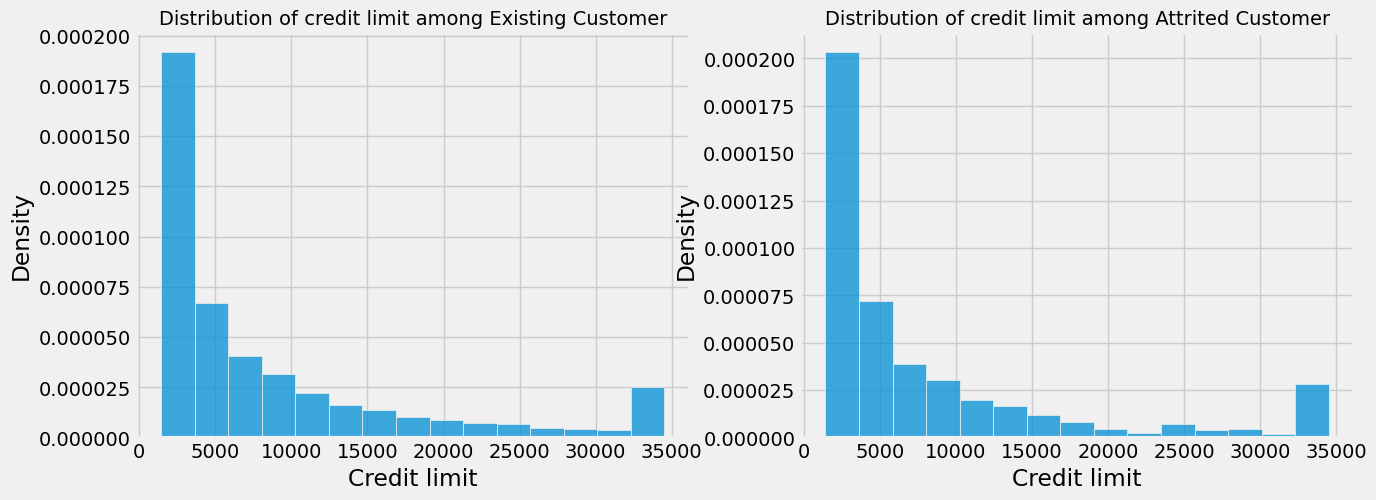

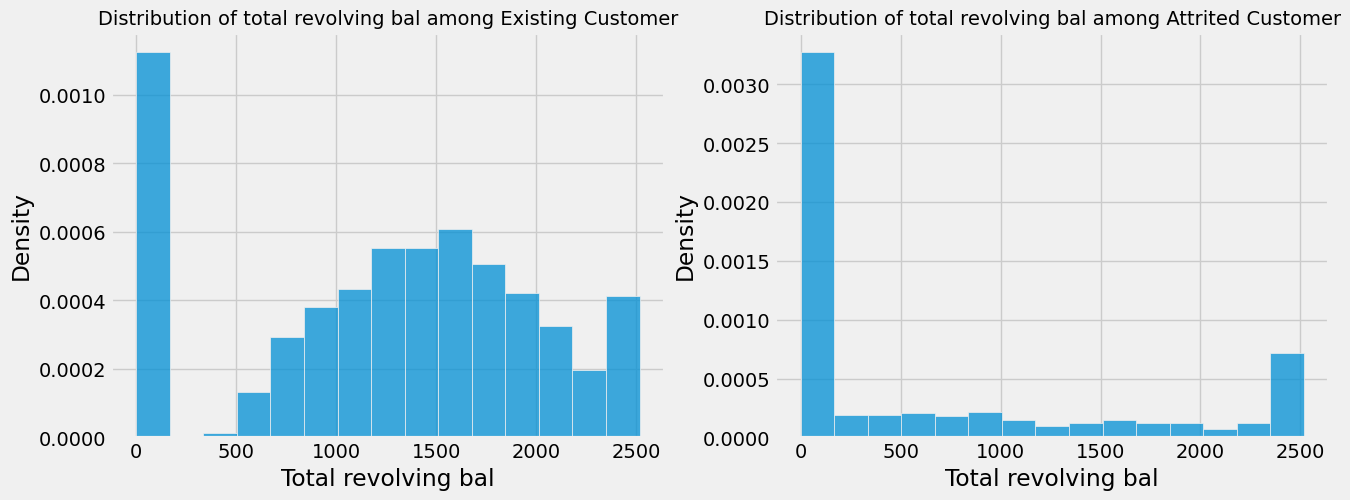

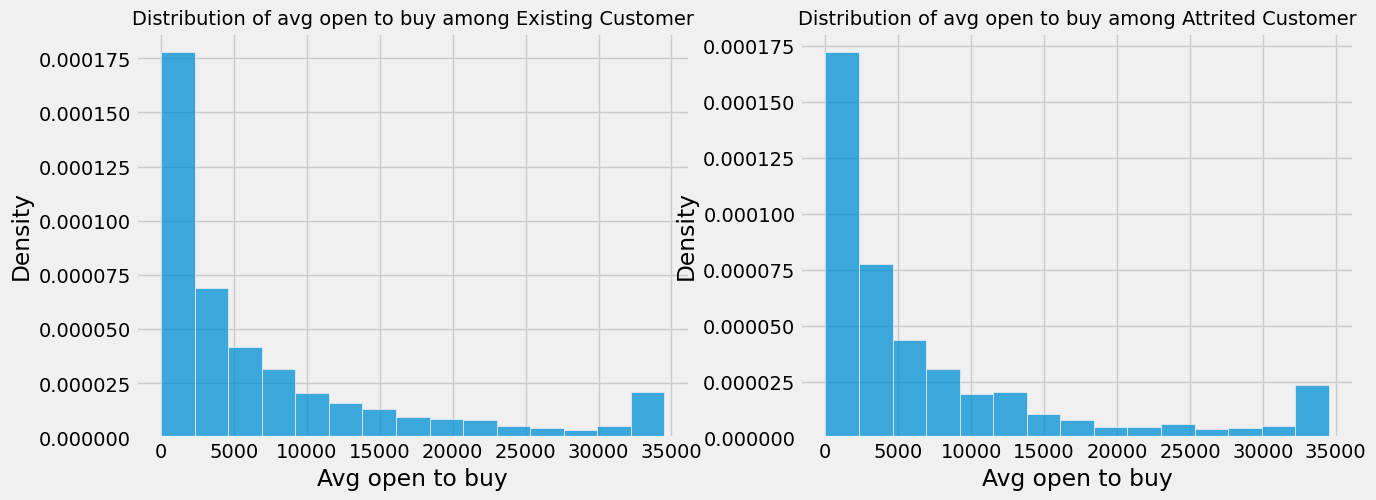

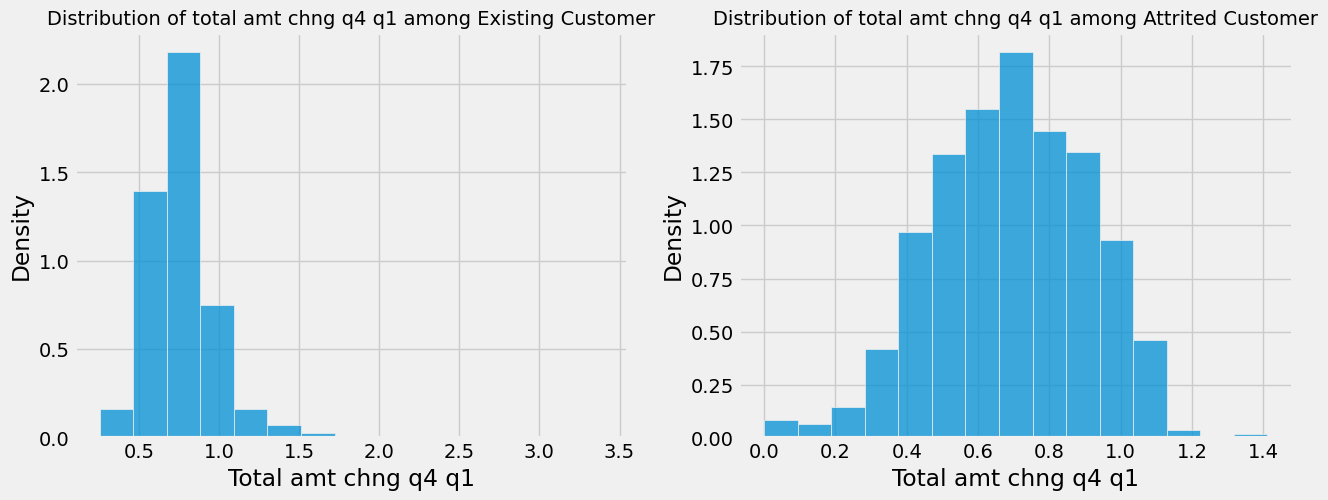

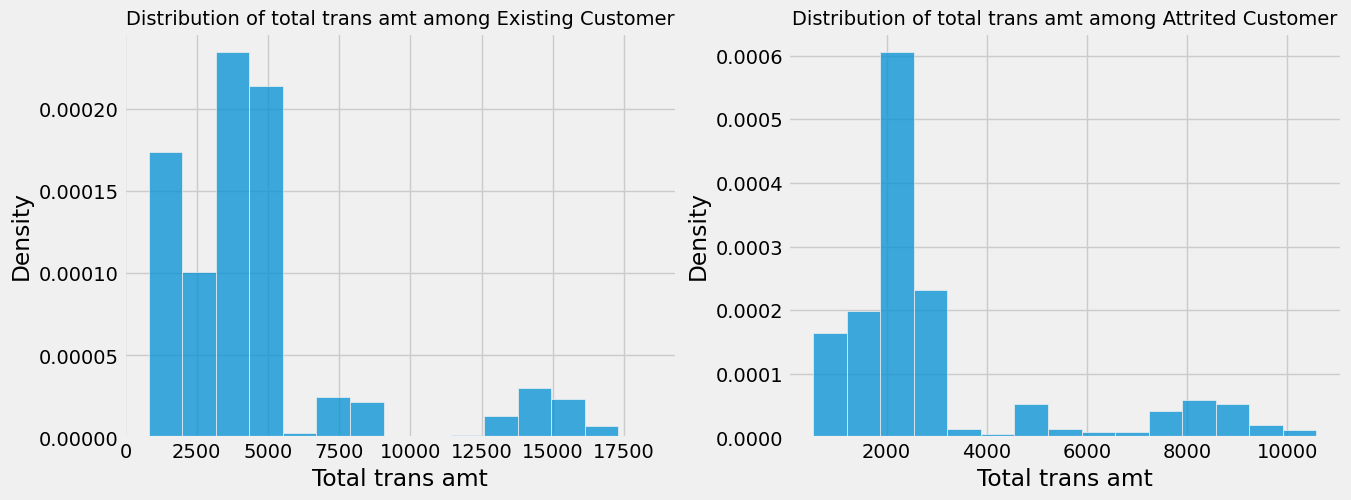

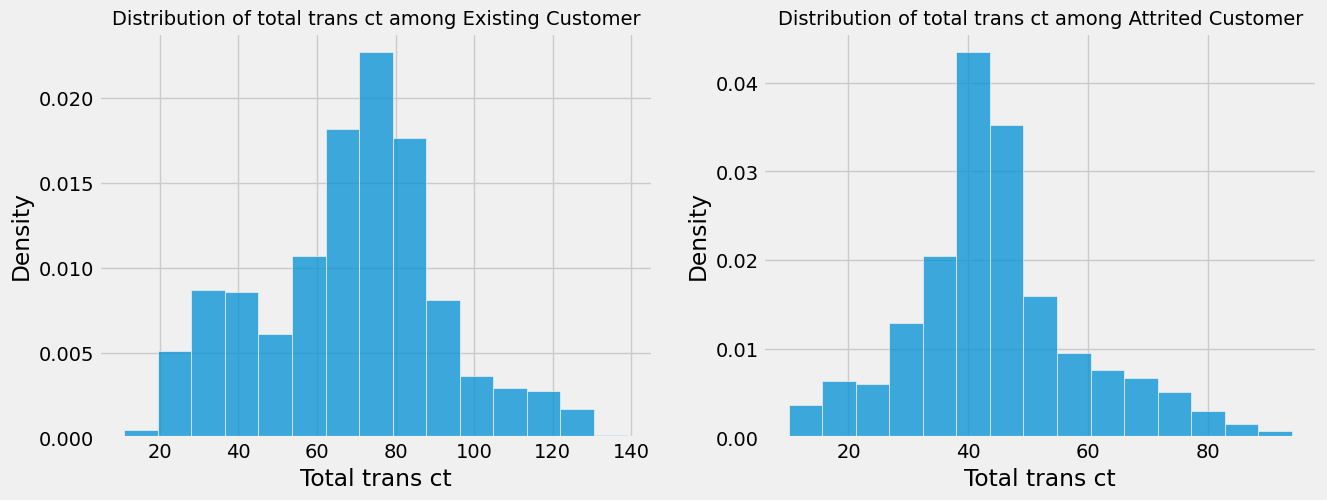

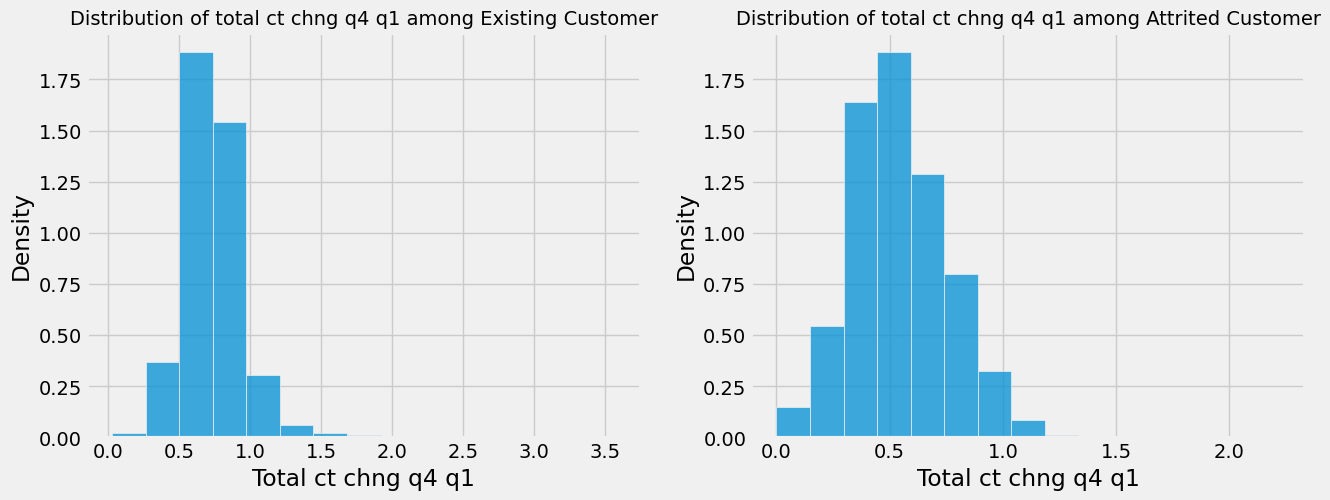

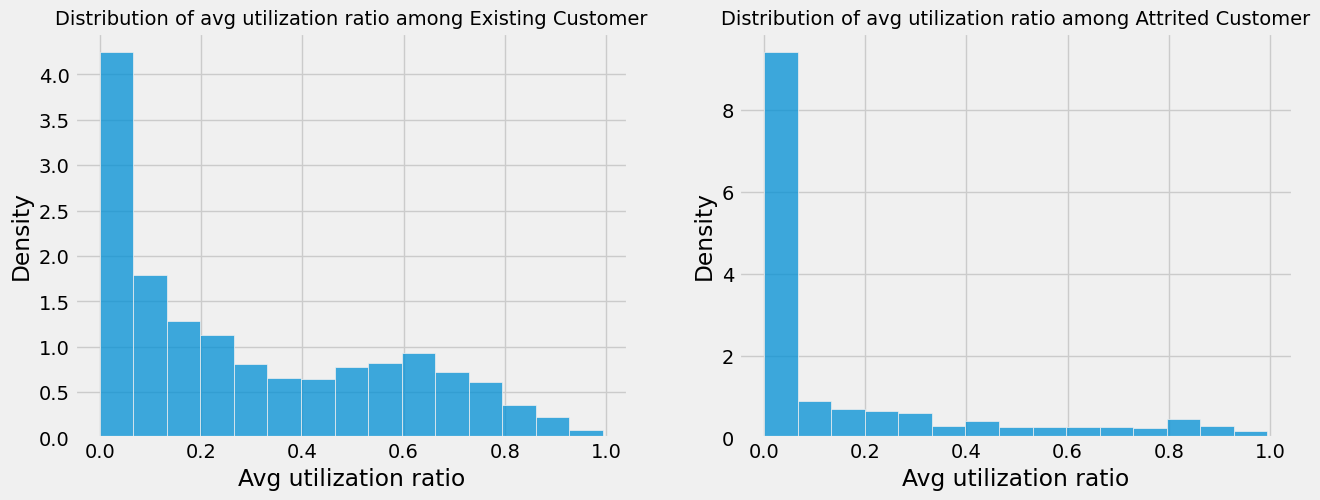

In [10]:
plot_numeric_features(train)

**Observation**
- All count columns except `total_trans_ct` (total transaction count) and `months_on_book` (period of relationship with bank as month count) have finite values ranging from `0` to `6`
- Distribution of variables `dependent_count`, `months_on_book`, `months_inactive_12_mon`, `credit_limit` and `avg_open_to_buy` in attrited customer and existing customer groups are very similar

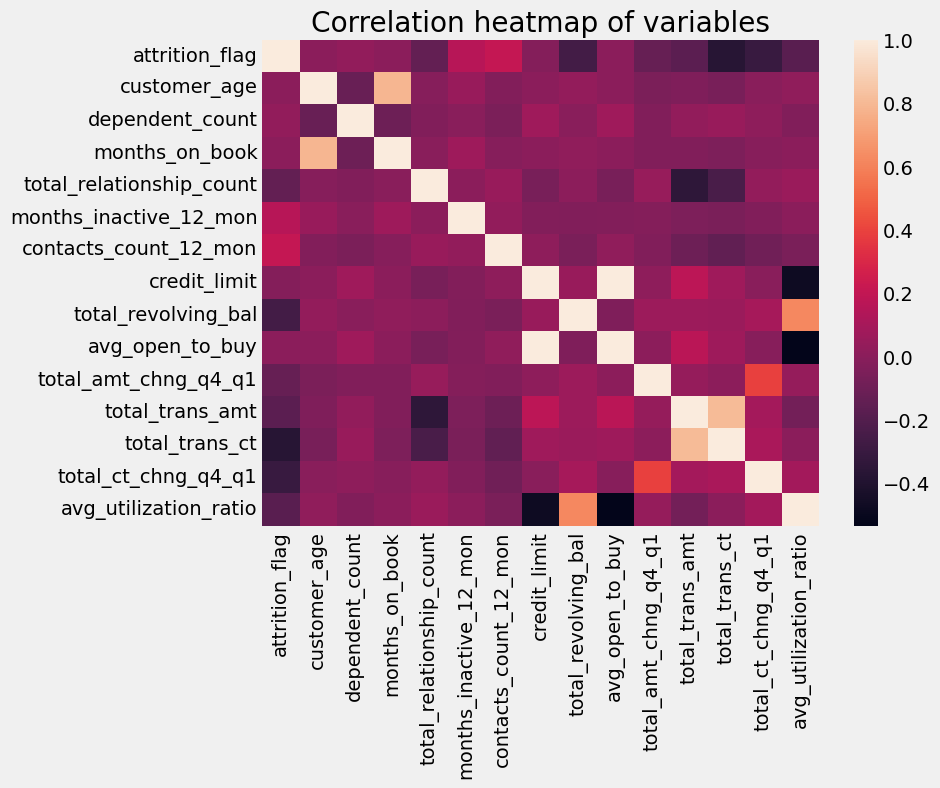

In [11]:
plot_corr_hmap(train, target_col=target_col)

**Observation**
- There is a perfect correlation between `credit_limit` and `avg_open_to_buy`; thus, we need to drop one of these variables if we are going to use model with OLS under the hood.
- High no. of inactive months, contact counts in last `12` months are associated with churning. Whereas, low relationship count, revolving balance, transaction count, transaction amount, change in transaction count (Q4 over Q1)  and average card utilization ratio are associated with churning. No features have strong correlation with our target variable.

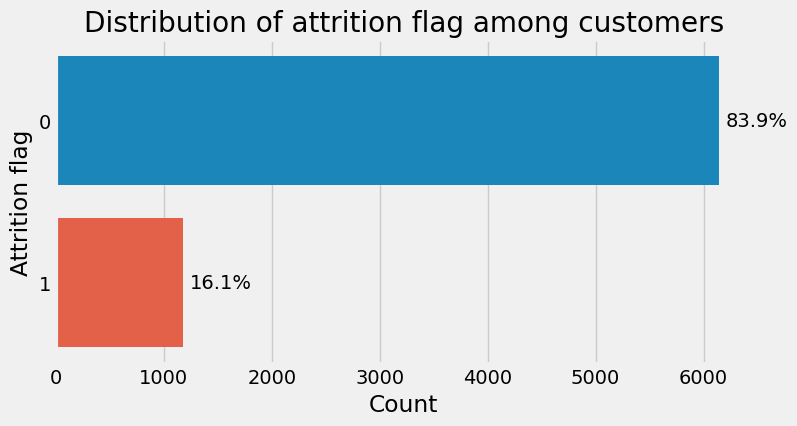

In [12]:
plot_labels(train)

**Observation**
- Attrition flag is highly imbalanced and in order not to let the class imbalance make model always predict majority class, we could either gather more data for the minority class or use balanced class weights to penalize model harder on wrong prediction for minority class

### References

- [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) 